In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI_Collection_and_Loss_Reverse_Forecast\modelling\nasabah\regresi\data_baru\new_data.csv")
df.head()

,Unnamed: 0,number_of_dependents,net_income,loan_amount,tenor,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,debtor_education_level,aging,loss_reverse
0,0,3.0,15500000.0,62500000.0,21.0,2.0,1.0,670.0,0.0,11000000.0,D3,DPK,0.0
1,1,3.0,17500000.0,70833333.0,18.0,31.0,3.0,402.0,1.0,17000000.0,D3,DPK,17708333.0
2,2,4.0,17500000.0,59333333.0,17.0,0.0,0.0,505.0,0.0,14500000.0,D2,Lancar,0.0
3,3,3.0,15500000.0,61166667.0,17.0,64.0,5.0,508.0,1.0,11500000.0,D2,DPK,15291667.0
4,4,5.0,8700000.0,56166667.0,15.0,14.0,2.0,371.0,0.0,5500000.0,SMA,DPK,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              5000 non-null   int64  
 1   number_of_dependents    5000 non-null   float64
 2   net_income              5000 non-null   float64
 3   loan_amount             5000 non-null   float64
 4   tenor                   5000 non-null   float64
 5   amount_of_late          5000 non-null   float64
 6   late_payment_amount     5000 non-null   float64
 7   credit_score            5000 non-null   float64
 8   arrears_amounts         5000 non-null   float64
 9   aset                    5000 non-null   float64
 10  debtor_education_level  5000 non-null   object 
 11  aging                   5000 non-null   object 
 12  loss_reverse            5000 non-null   float64
dtypes: float64(10), int64(1), object(2)
memory usage: 507.9+ KB


In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [5]:
columns = {}
for i in df.columns:
    if df[i].dtype == "category" or df[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df[i])
        df[i] = columns[i].transform(df[i])
             
scaler = RobustScaler().fit(df[[i for i in df.columns if i not in columns]])
df2 = pd.DataFrame(scaler.transform(df[[i for i in df.columns if i not in columns]]), columns=df[[i for i in df.columns if i not in columns]].columns)
for i in columns:
    df2[i] = df[i]
df2.head(5)

,number_of_dependents,net_income,loan_amount,tenor,amount_of_late,late_payment_amount,credit_score,arrears_amounts,aset,loss_reverse,debtor_education_level,aging
0,0.0,0.000000,0.190476,0.909091,-0.800000,-0.6,1.589041,-1.0,0.6,-0.928218,2,0
1,0.0,0.266667,0.984127,0.636364,-0.413333,-0.2,0.365297,0.0,1.8,0.123762,2,0
2,0.5,0.266667,-0.111111,0.545455,-0.826667,-0.8,0.835616,-1.0,1.3,-0.928218,1,3
3,0.0,0.000000,0.063492,0.545455,0.026667,0.2,0.849315,0.0,0.7,-0.019802,1,0
4,1.0,-0.906667,-0.412698,0.363636,-0.640000,-0.4,0.223744,-1.0,-0.5,-0.928218,7,0


In [6]:
from sklearn.metrics import silhouette_score

# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=2, random_state=42)
# Fit the KMeans model
km.fit(df2)
# Calculate Silhoutte Score
score = silhouette_score(df2, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouetter Average Score: 0.506


In [7]:
y = km.predict(df2)
df2["result"] = y

for i in columns:
    df2[i] = columns[i].inverse_transform(df2[i])
 
df2[[i for i in df.columns if i not in columns]] = scaler.inverse_transform(df2[[i for i in df.columns if i not in columns]])             



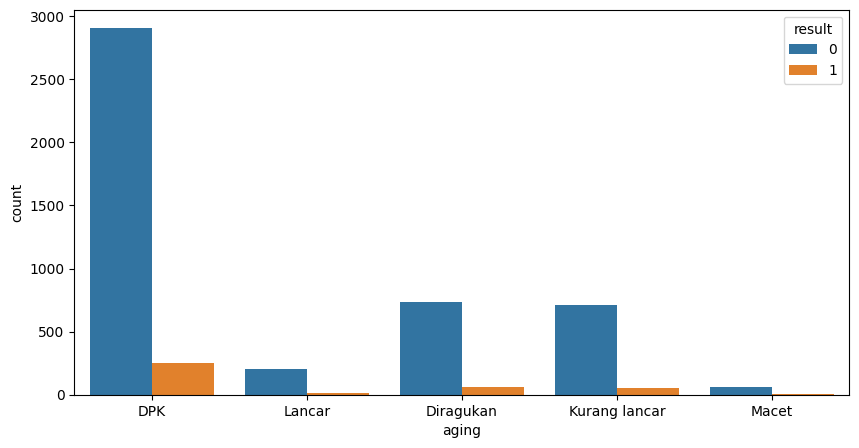

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=df2, x="aging", hue="result")
plt.show()

<Axes: xlabel='result', ylabel='net_income'>

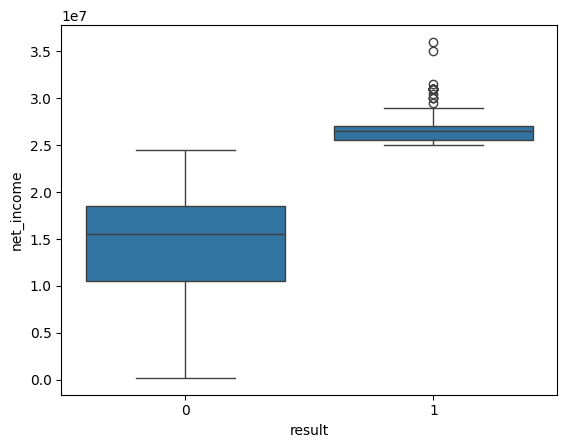

In [9]:
sns.boxplot(data=df2, x="result", y="net_income")

<Axes: xlabel='result', ylabel='loss_reverse'>

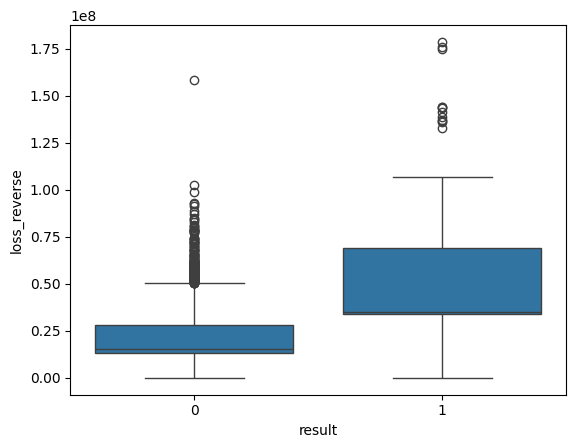

In [10]:
sns.boxplot(data=df2, x="result", y="loss_reverse")

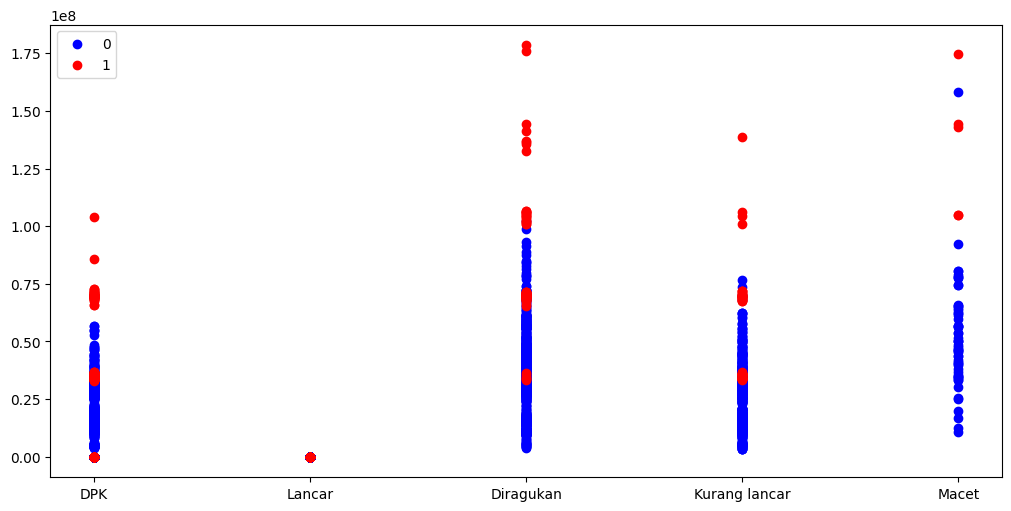

In [11]:
fig, ax = plt.subplots(figsize=(10, 5), layout="constrained")

ax.scatter(df2[df2["result"] == 0]["aging"], df2[df2["result"] == 0]["loss_reverse"], color="blue", label="0")
ax.scatter(df2[df2["result"] == 1]["aging"], df2[df2["result"] == 1]["loss_reverse"], color="red", label="1")
# ax.scatter(df2[df2["result"] == 2]["aging"], df2[df2["result"] == 2]["loss_reverse"], color="green", label="2")
# ax.scatter(df2[df2["result"] == 3]["aging"], df2[df2["result"] == 3]["loss_reverse"], color="purple", label="3")

plt.legend()
plt.show()

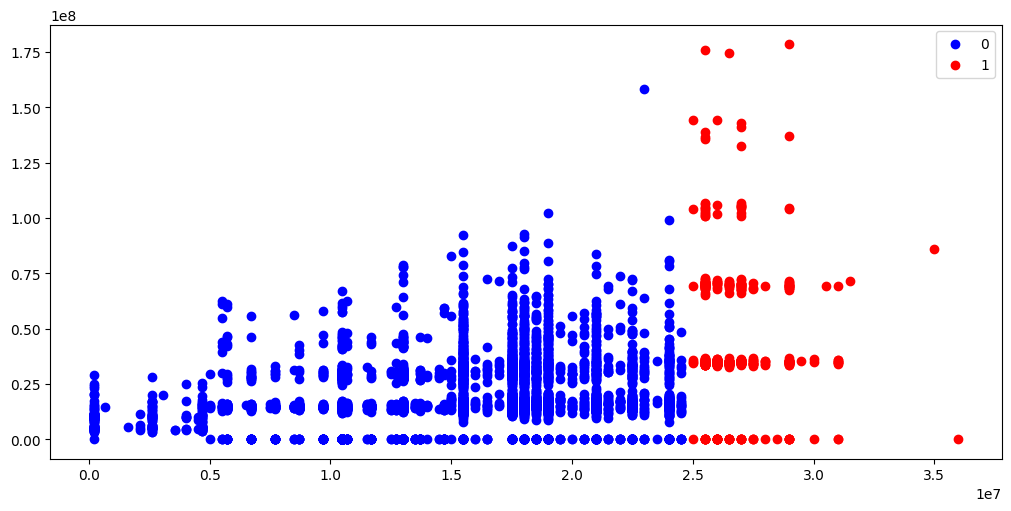

In [12]:
fig, ax = plt.subplots(figsize=(10, 5), layout="constrained")
ax.scatter(df2[df2["result"] == 0]["net_income"], df2[df2["result"] == 0]["loss_reverse"], color="blue", label="0")
ax.scatter(df2[df2["result"] == 1]["net_income"], df2[df2["result"] == 1]["loss_reverse"], color="red", label="1")
# ax.scatter(df2[df2["result"] == 2]["net_income"], df2[df2["result"] == 2]["loss_reverse"], color="green", label="2")
# ax.scatter(df2[df2["result"] == 3]["net_income"], df2[df2["result"] == 3]["loss_reverse"], color="purple", label="3")

plt.legend()
plt.show()

In [13]:
df2["result"].value_counts()

result
0    4610
1     390
Name: count, dtype: int64

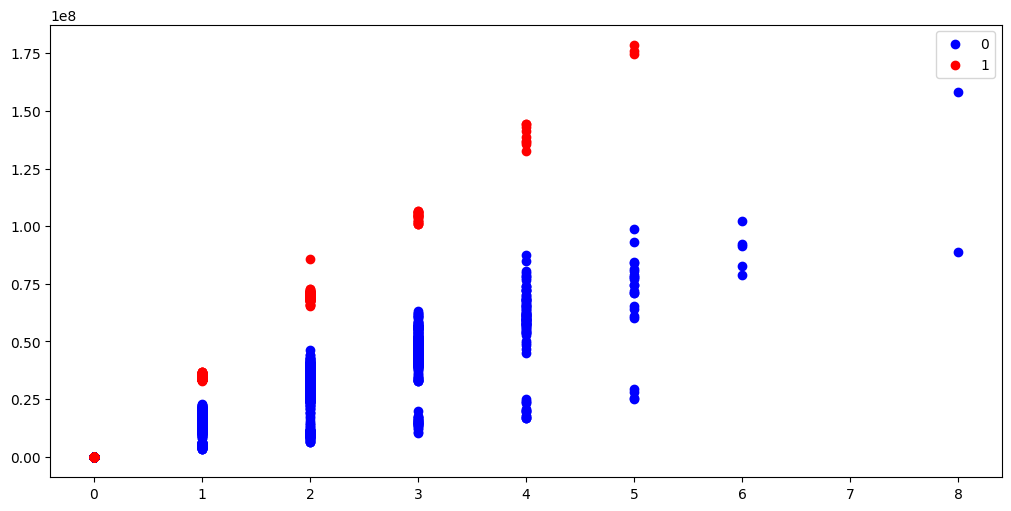

In [14]:
fig, ax = plt.subplots(figsize=(10, 5), layout="constrained")
ax.scatter(df2[df2["result"] == 0]["arrears_amounts"], df2[df2["result"] == 0]["loss_reverse"], color="blue", label="0")
ax.scatter(df2[df2["result"] == 1]["arrears_amounts"], df2[df2["result"] == 1]["loss_reverse"], color="red", label="1")
# ax.scatter(df2[df2["result"] == 2]["arrears_amounts"], df2[df2["result"] == 2]["loss_reverse"], color="green", label="2")
# ax.scatter(df2[df2["result"] == 3]["arrears_amounts"], df2[df2["result"] == 3]["loss_reverse"], color="purple", label="3")

plt.legend()
plt.show()

In [15]:
df_new = pd.read_csv(r"./data/data_for_clustering.csv")
df_new.head()

,Unnamed: 0,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse
0,0,15500000.0,62500000.0,2.0,1.0,670.0,0.0,0.0
1,1,17500000.0,70833333.0,31.0,3.0,402.0,1.0,17708333.0
2,2,17500000.0,59333333.0,0.0,0.0,505.0,0.0,0.0
3,3,15500000.0,61166667.0,64.0,5.0,508.0,1.0,15291667.0
4,4,8700000.0,56166667.0,14.0,2.0,371.0,0.0,0.0


In [16]:
for i in df_new.columns:
    if df_new[i].dtype == "object":
        df_new[i] = df_new[i].astype("category")

df_new.drop(["Unnamed: 0"], axis=1, inplace=True)

In [17]:
columns = {}
for i in df_new.columns:
    if df_new[i].dtype == "category" or df_new[i].dtype == "object":
        columns[i] = LabelEncoder().fit(df_new[i])
        df_new[i] = columns[i].transform(df_new[i])
             
scaler = RobustScaler().fit(df_new[[i for i in df_new.columns if i not in columns]])
df3 = pd.DataFrame(scaler.transform(df_new[[i for i in df_new.columns if i not in columns]]), columns=df_new[[i for i in df_new.columns if i not in columns]].columns)
for i in columns:
    df3[i] = df_new[i]
df3.head(5)

,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse
0,0.000000,0.190476,-0.800000,-0.6,1.589041,-1.0,-0.928218
1,0.266667,0.984127,-0.413333,-0.2,0.365297,0.0,0.123762
2,0.266667,-0.111111,-0.826667,-0.8,0.835616,-1.0,-0.928218
3,0.000000,0.063492,0.026667,0.2,0.849315,0.0,-0.019802
4,-0.906667,-0.412698,-0.640000,-0.4,0.223744,-1.0,-0.928218


In [18]:
from sklearn.metrics import silhouette_score

# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=2, random_state=42)
# Fit the KMeans model
km.fit(df3)
# Calculate Silhoutte Score
score = silhouette_score(df3, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

c:\Program Files\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouetter Average Score: 0.682


In [19]:
y = km.predict(df3)
df3["result"] = y

for i in columns:
    df3[i] = columns[i].inverse_transform(df3[i])
 
df3[[i for i in df_new.columns if i not in columns]] = scaler.inverse_transform(df3[[i for i in df_new.columns if i not in columns]])             



In [20]:
df3.head()

,net_income,loan_amount,amount_of_late,late_payment_amount,credit_score,arrears_amounts,loss_reverse,result
0,15500000.0,62500000.0,2.0,1.0,670.0,0.0,0.0,0
1,17500000.0,70833333.0,31.0,3.0,402.0,1.0,17708333.0,0
2,17500000.0,59333333.0,0.0,0.0,505.0,0.0,0.0,0
3,15500000.0,61166667.0,64.0,5.0,508.0,1.0,15291667.0,0
4,8700000.0,56166667.0,14.0,2.0,371.0,0.0,0.0,0


<Axes: xlabel='result', ylabel='loss_reverse'>

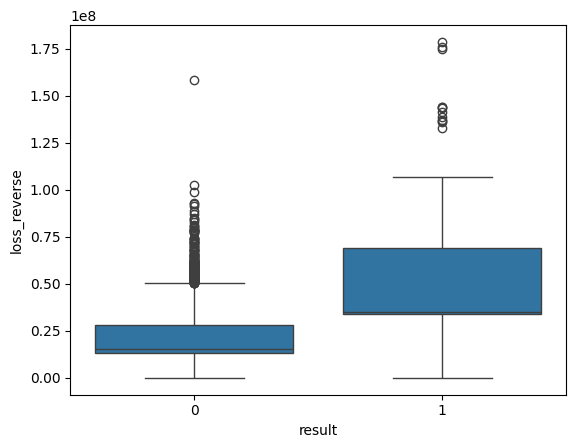

In [21]:
sns.boxplot(data=df3, x="result", y="loss_reverse")

<Axes: xlabel='result', ylabel='net_income'>

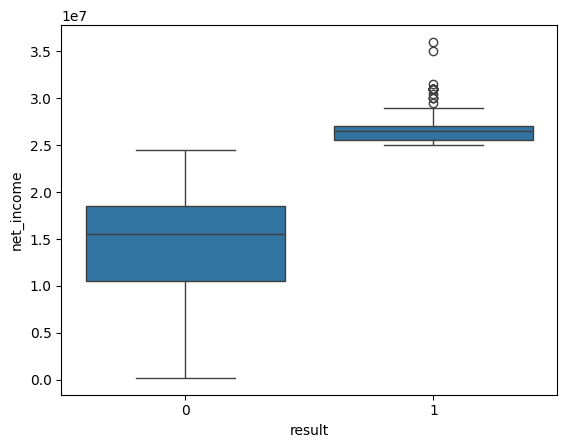

In [22]:
sns.boxplot(data=df3, x="result", y="net_income")

<Axes: xlabel='result', ylabel='loan_amount'>

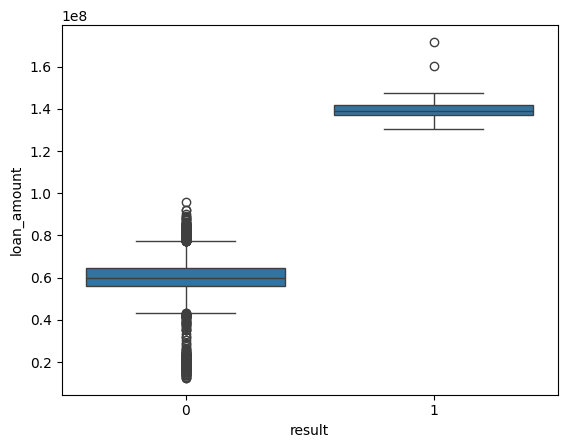

In [23]:
sns.boxplot(data=df3, x="result", y="loan_amount")

<Axes: xlabel='result', ylabel='amount_of_late'>

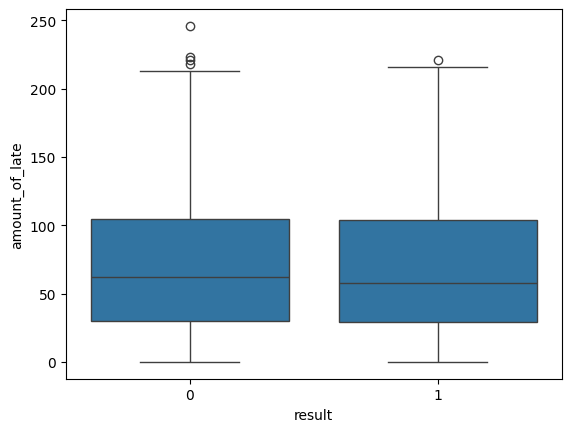

In [24]:
sns.boxplot(data=df3, x="result", y="amount_of_late")

<Axes: xlabel='result', ylabel='late_payment_amount'>

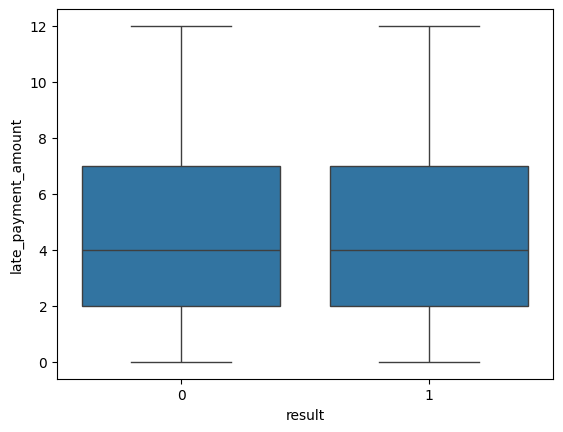

In [25]:
sns.boxplot(data=df3, x="result", y="late_payment_amount")

<Axes: xlabel='result', ylabel='arrears_amounts'>

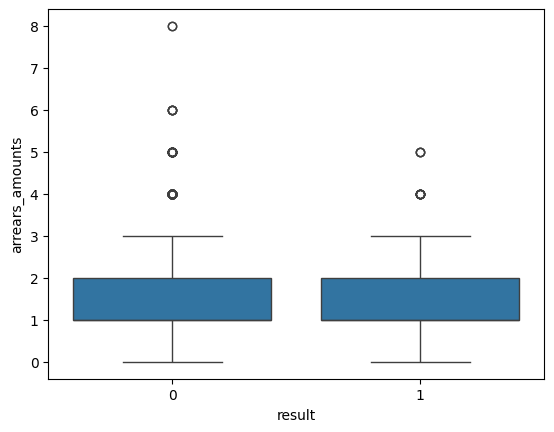

In [26]:
sns.boxplot(data=df3, x="result", y="arrears_amounts")

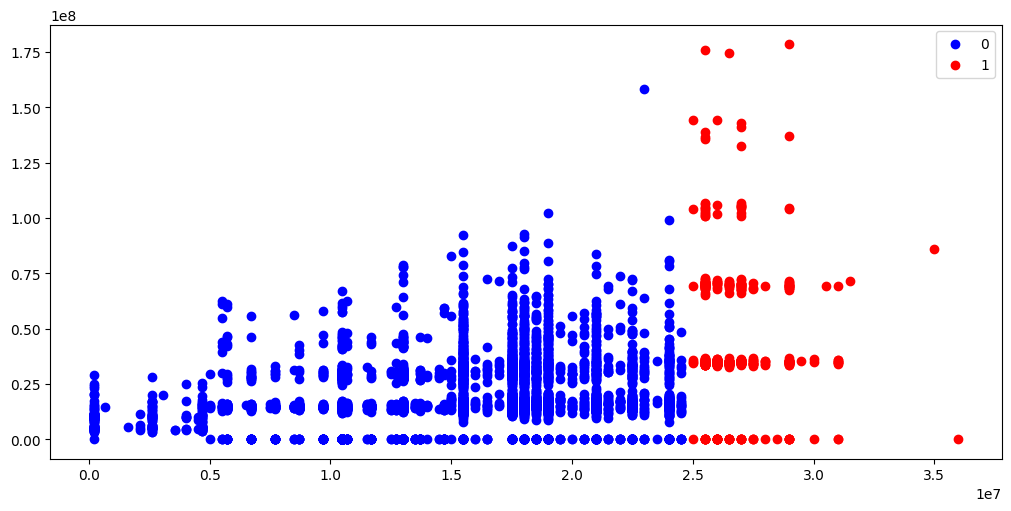

In [27]:
fig, ax = plt.subplots(figsize=(10, 5), layout="constrained")
ax.scatter(df3[df3["result"] == 0]["net_income"], df3[df3["result"] == 0]["loss_reverse"], color="blue", label="0")
ax.scatter(df3[df2["result"] == 1]["net_income"], df3[df3["result"] == 1]["loss_reverse"], color="red", label="1")
# ax.scatter(df2[df2["result"] == 2]["net_income"], df2[df2["result"] == 2]["loss_reverse"], color="green", label="2")
# ax.scatter(df2[df2["result"] == 3]["net_income"], df2[df2["result"] == 3]["loss_reverse"], color="purple", label="3")

plt.legend()
plt.show()

In [28]:
df3["result"].value_counts()

result
0    4610
1     390
Name: count, dtype: int64